In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from numpy.random import RandomState

In [2]:
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/SVM-COLABS/All-baca-7040x73.csv", error_bad_lines=False)
df.head()
#test = pd.read_csv("/content/drive/MyDrive/SVM-COLABS/All-baca-7040x73.csv", error_bad_lines=False)
#test.head()

Mounted at /content/drive


,SUBJEK,KATA,LABEL,AF3_THETA,AF3_ALPHA,AF3_LOW_BETA,AF3_HIGH_BETA,AF3_GAMMA,F7_THETA,F7_ALPHA,F7_LOW_BETA,F7_HIGH_BETA,F7_GAMMA,F3_THETA,F3_ALPHA,F3_LOW_BETA,F3_HIGH_BETA,F3_GAMMA,FC5_THETA,FC5_ALPHA,FC5_LOW_BETA,FC5_HIGH_BETA,FC5_GAMMA,T7_THETA,T7_ALPHA,T7_LOW_BETA,T7_HIGH_BETA,T7_GAMMA,P7_THETA,P7_ALPHA,P7_LOW_BETA,P7_HIGH_BETA,P7_GAMMA,O1_THETA,O1_ALPHA,O1_LOW_BETA,O1_HIGH_BETA,O1_GAMMA,O2_THETA,O2_ALPHA,O2_LOW_BETA,O2_HIGH_BETA,O2_GAMMA,P8_THETA,P8_ALPHA,P8_LOW_BETA,P8_HIGH_BETA,P8_GAMMA,T8_THETA,T8_ALPHA,T8_LOW_BETA,T8_HIGH_BETA,T8_GAMMA,FC6_THETA,FC6_ALPHA,FC6_LOW_BETA,FC6_HIGH_BETA,FC6_GAMMA,F4_THETA,F4_ALPHA,F4_LOW_BETA,F4_HIGH_BETA,F4_GAMMA,F8_THETA,F8_ALPHA,F8_LOW_BETA,F8_HIGH_BETA,F8_GAMMA,AF4_THETA,AF4_ALPHA,AF4_LOW_BETA,AF4_HIGH_BETA,AF4_GAMMA
0,S01-1Aj,MAKAN,2,4.464708,1.795277,0.778195,6.278142,0.948076,2.599018,1.176150,0.445877,3.114377,0.660038,5.167149,3.051822,1.761174,6.589579,1.859859,4.290996,2.631142,0.715426,3.757160,0.955828,0.012877,0.034104,0.036523,0.012597,0.023914,1.509501,0.922565,0.344637,0.635072,0.272662,1.368865,0.950213,0.453015,0.911978,0.256057,4.410742,1.443361,0.728903,1.563281,0.398380,4.490590,1.051378,0.574227,1.287267,0.308411,0.002624,0.010167,0.013034,0.005055,0.008109,4.512257,1.915953,0.518269,1.482260,0.496776,4.654989,2.226291,0.567761,2.902431,1.939809,10.728572,1.997409,0.928194,0.753753,0.375547,6.782176,1.866855,0.781449,1.916544,1.522779
1,S01-1Aj,MAKAN,2,3.033470,2.028336,0.933330,6.659462,0.916482,1.824260,1.254074,0.634456,3.700502,0.653975,5.538662,3.238735,2.435359,6.968209,1.753316,4.506341,3.073260,1.025906,4.304115,0.917922,0.011375,0.036680,0.036192,0.009940,0.029393,1.051738,0.734631,0.372054,0.572427,0.289641,0.933181,0.759275,0.475942,0.859257,0.269846,4.153225,1.333462,0.840744,1.554679,0.408189,4.988484,1.029724,0.726442,1.208350,0.312911,0.002890,0.012621,0.016462,0.006229,0.009084,4.496732,2.227153,0.687470,1.400296,0.434498,5.031673,2.499861,0.671697,2.605301,1.712137,10.334194,2.218516,1.273915,0.610819,0.342051,5.532071,2.337674,1.011535,1.609977,1.325849
2,S01-1Aj,MAKAN,2,2.961815,2.302890,1.135897,6.473575,0.807020,1.451066,1.358118,0.883208,3.897205,0.589395,6.492306,3.368357,2.986723,6.769273,1.467760,5.167661,3.370718,1.350172,4.417591,0.792511,0.010858,0.038574,0.033440,0.008001,0.035128,0.736357,0.682544,0.426366,0.513113,0.301232,0.666059,0.623686,0.535990,0.804378,0.285781,4.082249,1.222608,1.052023,1.562331,0.431437,5.403524,1.004236,0.953526,1.123133,0.330900,0.002866,0.015788,0.019660,0.007645,0.010138,4.672633,2.611035,0.941095,1.397395,0.387034,5.627406,2.866307,0.820381,2.410364,1.398880,9.680595,2.545743,1.700698,0.568555,0.318679,5.906456,2.803738,1.313641,1.412653,1.070558
3,S01-1Aj,MAKAN,2,3.797894,2.702664,1.314570,5.688627,0.661334,1.454463,1.463701,1.114877,3.656171,0.492973,7.942379,3.333857,3.219070,6.026298,1.093270,6.008296,3.399372,1.560908,4.041981,0.622929,0.011858,0.038357,0.029122,0.007670,0.039742,0.550913,0.741080,0.476391,0.471400,0.302296,0.584288,0.535190,0.591404,0.739472,0.298908,4.086728,1.125316,1.273637,1.578566,0.467418,5.493555,0.975270,1.171769,1.049675,0.358399,0.002692,0.018988,0.021374,0.008941,0.011126,4.914884,3.012234,1.213227,1.450315,0.363118,6.224400,3.277162,0.955123,2.279465,1.075046,8.828448,2.899751,2.081439,0.620827,0.305636,7.325518,3.417255,1.624153,1.305130,0.817961
4,S01-1Aj,MAKAN,2,6.828661,3.425307,1.405881,4.518988,0.532399,1.986457,1.560375,1.256536,3.083162,0.399604,9.777117,3.127272,3.053104,5.008856,0.742028,7.066042,3.124783,1.582716,3.303811,0.466748,0.014301,0.035146,0.024599,0.009478,0.041990,0.466763,0.840741,0.497857,0.451688,0.292492,0.645038,0.473205,0.614195,0.661571,0.305547,3.978190,1.041311,1.408485,1.585141,0.513325,5.092508,0.940067,1.301308,0.991446,0.390812,0.002711,0.021295,0.020858,0.009674,0.011876,5.154019,3.336075,1.430470,1.522812,0.361887,6.856253,3.650636,1.019399,2.191507,0.818509,8.196053,3.192119,2.291647,0.731953,0.302914,11.453557,4.499370,1.867601,1.266913

In [3]:
df.columns

Index(['SUBJEK', 'KATA', 'LABEL', 'AF3_THETA', 'AF3_ALPHA', 'AF3_LOW_BETA',
       'AF3_HIGH_BETA', 'AF3_GAMMA', 'F7_THETA', 'F7_ALPHA', 'F7_LOW_BETA',
       'F7_HIGH_BETA', 'F7_GAMMA', 'F3_THETA', 'F3_ALPHA', 'F3_LOW_BETA',
       'F3_HIGH_BETA', 'F3_GAMMA', 'FC5_THETA', 'FC5_ALPHA', 'FC5_LOW_BETA',
       'FC5_HIGH_BETA', 'FC5_GAMMA', 'T7_THETA', 'T7_ALPHA', 'T7_LOW_BETA',
       'T7_HIGH_BETA', 'T7_GAMMA', 'P7_THETA', 'P7_ALPHA', 'P7_LOW_BETA',
       'P7_HIGH_BETA', 'P7_GAMMA', 'O1_THETA', 'O1_ALPHA', 'O1_LOW_BETA',
       'O1_HIGH_BETA', 'O1_GAMMA', 'O2_THETA', 'O2_ALPHA', 'O2_LOW_BETA',
       'O2_HIGH_BETA', 'O2_GAMMA', 'P8_THETA', 'P8_ALPHA', 'P8_LOW_BETA',
       'P8_HIGH_BETA', 'P8_GAMMA', 'T8_THETA', 'T8_ALPHA', 'T8_LOW_BETA',
       'T8_HIGH_BETA', 'T8_GAMMA', 'FC6_THETA', 'FC6_ALPHA', 'FC6_LOW_BETA',
       'FC6_HIGH_BETA', 'FC6_GAMMA', 'F4_THETA', 'F4_ALPHA', 'F4_LOW_BETA',
       'F4_HIGH_BETA', 'F4_GAMMA', 'F8_THETA', 'F8_ALPHA', 'F8_LOW_BETA',
       'F8_HIGH_BETA', '

In [4]:
#Frequency distribution of classes"
train_outcome = pd.crosstab(index=df['KATA'],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0,count
KATA,
HAUS,880
LAPAR,880
MAKAN,880
MINUM,880
SAKIT,880
SEDIH,880
SENANG,880
TOILET,880


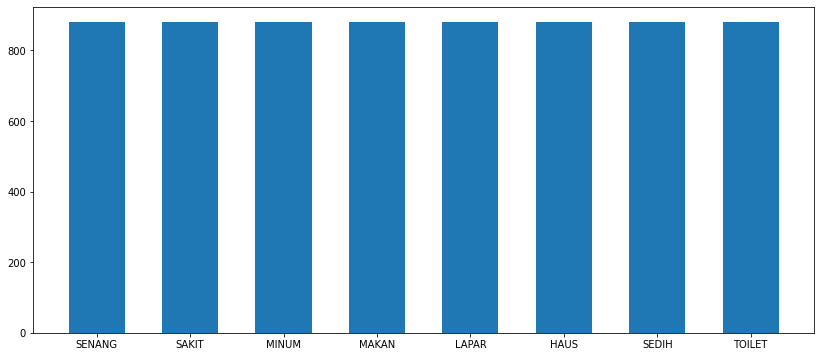

In [5]:
temp = df['KATA'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values})


labels = df['labels']
sizes = df['values']

x_pos = [i for i, _ in enumerate(labels)]

plt.figure(1, [14, 6])
plt.bar(x_pos, sizes,width=0.6)
plt.xticks(x_pos, labels)
plt.show()

Data Splitting

In [6]:
rng = RandomState()
df = pd.read_csv("/content/drive/MyDrive/SVM-COLABS/All-baca-7040x73.csv", error_bad_lines=False)
train = df.sample(frac=0.7, random_state=rng)
test = df.loc[~df.index.isin(train.index)]

Normalize the Predictor(Feature Set) for SVM training

In [7]:
# Seperating Predictors and Outcome values from train and test sets
X_train = pd.DataFrame(train.drop(['SUBJEK','KATA','LABEL'],axis=1))
Y_train_label = train.LABEL.values.astype(object)

X_test = pd.DataFrame(test.drop(['SUBJEK','KATA','LABEL'],axis=1))
Y_test_label = test.LABEL.values.astype(object)

# Dimension of Train and Test set 
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)

# encoding test labels 
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)

#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)
#list(set(X_train.columns) - set(num_cols))


names_of_predictors = list(X_train.columns.values)


Dimension of Train set (4928, 70)
Dimension of Test set (2112, 70) 

Number of numeric features: 70


Hyperparameter tuning using grid search and cross validation

In [8]:
'''
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-1, 1e-2, 1e-3, 1e-4],'C': [1, 10, 100, 1000]}]#,
               #{'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
               #[{'kernel': ['poly'],'gamma': [1e-1, 1e-2, 1e-3, 1e-4], 'degree' : [3, 4, 5, 6], 'C': [1, 10, 100, 1000]}]#,
              #{'kernel': ['sigmoid'],'gamma': [1e-1, 1e-2, 1e-3, 1e-4], 'C': [1, 10, 100, 1000]}]
'''

"\n#Libraries to Build Ensemble Model : Random Forest Classifier \n# Create the parameter grid based on the results of random search \nparams_grid = [{'kernel': ['rbf'], 'gamma': [1e-1, 1e-2, 1e-3, 1e-4],'C': [1, 10, 100, 1000]}]#,\n               #{'kernel': ['linear'], 'C': [1, 10, 100, 1000]},\n               #[{'kernel': ['poly'],'gamma': [1e-1, 1e-2, 1e-3, 1e-4], 'degree' : [3, 4, 5, 6], 'C': [1, 10, 100, 1000]}]#,\n              #{'kernel': ['sigmoid'],'gamma': [1e-1, 1e-2, 1e-3, 1e-4], 'C': [1, 10, 100, 1000]}]\n"

Training SVM model using radial kernel

In [9]:
'''
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=2, verbose=10, n_jobs=6)
svm_model.fit(X_train_scaled, Y_train)
'''

'\n# Performing CV to tune parameters for best SVM fit \nsvm_model = GridSearchCV(SVC(), params_grid, cv=2, verbose=10, n_jobs=6)\nsvm_model.fit(X_train_scaled, Y_train)\n'

In [10]:
final_model = SVC(kernel='rbf', gamma=0.001, C=1000)
#final_model = SVC(kernel='poly', gamma=0.001, C=1000)
final_model.fit(X_train, Y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
Y_pred = final_model.predict(X_test)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test  , Y_test ))

Training set score for SVM: 0.960227
Testing  set score for SVM: 0.807765


Confusion Matrix and Accuracy Score

In [12]:
'''
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))
'''

'\n# View the accuracy score\nprint(\'Best score for training data:\', svm_model.best_score_,"\n") \n\n# View the best parameters for the model found using grid search\nprint(\'Best C:\',svm_model.best_estimator_.C,"\n") \nprint(\'Best Kernel:\',svm_model.best_estimator_.kernel,"\n")\nprint(\'Best Gamma:\',svm_model.best_estimator_.gamma,"\n")\n\nfinal_model = svm_model.best_estimator_\nY_pred = final_model.predict(X_test_scaled)\nY_pred_label = list(encoder.inverse_transform(Y_pred))\n'

In [ ]:
# Making the Confusion Matrix
print(confusion_matrix(Y_test,Y_pred))
print("\n")
print(classification_report(Y_test,Y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test  , Y_test ))


[[164  48   5  11   5   6  13   5]
 [ 12 235   9   4   4   3   5   1]
 [ 10  62 162   6   7   8  13   1]
 [  9  46   7 165   8   2   6   3]
 [ 13  60  10  18 144   7  25   2]
 [  5  52  14   6  11 148  18   9]
 [  5  37   4   5   5   5 182   2]
 [  8  57   1  11   8   6   7 182]]


              precision    recall  f1-score   support

           0       0.73      0.64      0.68       257
           1       0.39      0.86      0.54       273
           2       0.76      0.60      0.67       269
           3       0.73      0.67      0.70       246
           4       0.75      0.52      0.61       279
           5       0.80      0.56      0.66       263
           6       0.68      0.74      0.71       245
           7       0.89      0.65      0.75       280

    accuracy                           0.65      2112
   macro avg       0.72      0.66      0.67      2112
weighted avg       0.72      0.65      0.66      2112

Training set score for SVM: 0.797687
Testing  set score for SVM: 0

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[233   5   4   2  12   4   3  15]
 [ 11 218   5   5   3   6   6  10]
 [ 13  14 211   9   5  11   3  10]
 [ 11   6   9 223   6   3   8  13]
 [ 16  16   7   3 200  10   8  11]
 [  5   4   4   0   9 196  12  10]
 [  3   9   6   3   4   9 208  12]
 [ 10   5   1   3   4   4   6 217]]
Normalized confusion matrix
[[0.84 0.02 0.01 0.01 0.04 0.01 0.01 0.05]
 [0.04 0.83 0.02 0.02 0.01 0.02 0.02 0.04]
 [0.05 0.05 0.76 0.03 0.02 0.04 0.01 0.04]
 [0.04 0.02 0.03 0.8  0.02 0.01 0.03 0.05]
 [0.06 0.06 0.03 0.01 0.74 0.04 0.03 0.04]
 [0.02 0.02 0.02 0.   0.04 0.82 0.05 0.04]
 [0.01 0.04 0.02 0.01 0.02 0.04 0.82 0.05]
 [0.04 0.02 0.   0.01 0.02 0.02 0.02 0.87]]


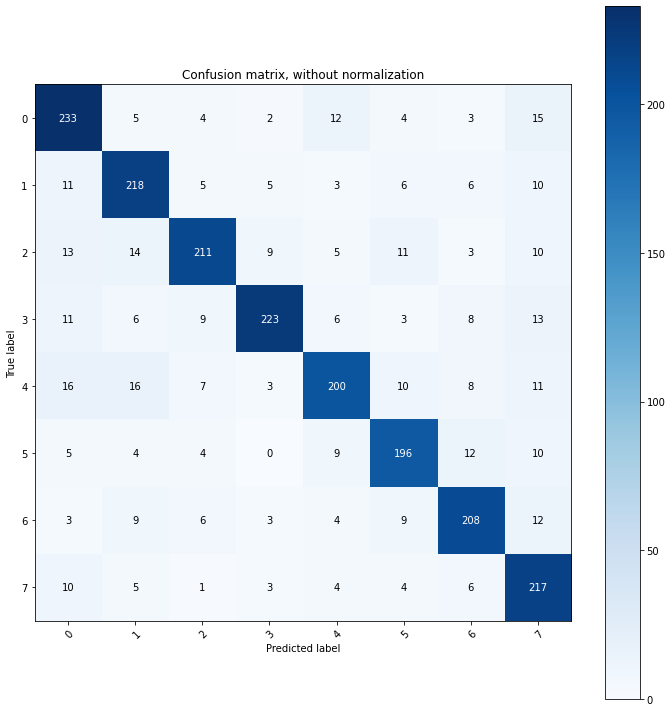

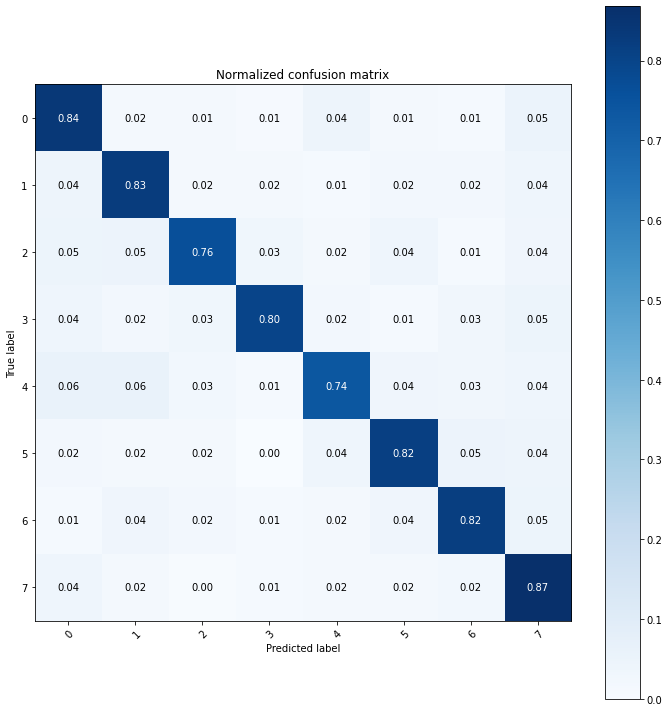

In [14]:
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_test, Y_pred, classes=labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, Y_pred, classes=labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()